# Basic example

This example demonstrates some of the core functionality and export features provided by rabpro.

In [1]:
import pandas as pd
import geopandas as gpd

import rabpro

First, we need to specify a point within our test DEM region.

In [2]:
coords = (56.22659, -130.87974)

Now we can initialize the profiler. The rabpro profiler is the main entry point into the package - it provides wrapper funcitons for most of the rabpro's core functionality.

Note that we can optionally specify a drainage area (`da`) or set `force_merit` to `True`, to ensure that we use MERIT data rather than HydroBasins to perform basin delineation.

In [3]:
rpo = rabpro.profiler(coords, name='basic_test')

rabpro can now compute the watershed for this point. This can take a few minutes to run.

In [4]:
%%capture
rpo.delineate_basins()

The basin geometry is stored in a GeoPandas GeoDataFrame, and can be accessed through the `rpo` object.

<AxesSubplot:>

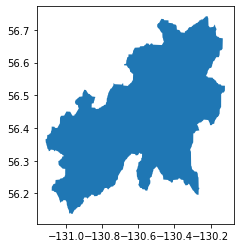

In [5]:
rpo.basins.plot()

Next, we compute the river elevation profile.

In [6]:
rpo.elev_profile()

Extracting flowpath from DEM...


The river elevation profile is stored in a GeoPandas GeoDataFrame, and can be accessed through the `rpo` object.

In [7]:
rpo.merit_gdf.head()

,geometry,Elevation (m),Width (m),row,col,Distance (m)
0,POINT (-130.19583 56.57917),2011.500000,0.0,34529,58945,0.000000
1,POINT (-130.19667 56.58000),1978.400024,0.0,34528,58946,105.817633
2,POINT (-130.19750 56.58000),1963.300049,0.0,34527,58947,156.867940
3,POINT (-130.19833 56.57917),1943.300049,0.0,34528,58948,262.685573
4,POINT (-130.19917 56.57833),1920.400024,0.0,34527,58949,368.503748


The basins and river elevation profile can be exported to GeoJSON with the export command:

In [8]:
%%capture
rpo.export("all")

Once the subbasins are delinated, rabpro can use Google Earth Engine (GEE) to compute statistics for each subbasin. Using Google Earth Engine reduces the need to store large datasets locally, and speeds up computation by using GEE's parallel distributed computing capabilities.

Note: In order to use rabpro for basin statistics, you'll need to sign up for a GEE account. See rabpro's documentation for more information.

In [9]:
# Specify which statistics to calculate for the JRC/GSW1_3/GlobalSurfaceWater dataset's occurrence band
statlist = ['min', 'max', 'range', 'std', 'sum', 'pct50', 'pct3']
data = rabpro.subbasin_stats.Dataset("JRC/GSW1_3/GlobalSurfaceWater", "occurrence", stats=statlist)

d, t = rpo.basin_stats([data], folder="rabpro test")

Computing subbasin stats for JRC/GSW1_3/GlobalSurfaceWater...


The output data will be placed in the `rabpro test` folder in your Google Drive if it already exists. If not, GEE will create a new `rabpro test` folder at the root level of your Drive.

`basin_stats` returns a url to the resulting csv data which can be read directly with `pandas`:

In [10]:
pd.read_csv(d[0])

,system:index,DA,count,max,mean,min,p3,p50,range,sum,.geo
0,0_0,2121.3,91173,100,80.523354,0,22.328632,91.629346,100,4.757363e+06,NaN
